# Crawling & Pre-processing Twitter data
## Twitter Data Crawler
Twitter is an online social networking/media site that allows users to send and read short (i.e., 140 characters) messages called "tweets" in real time. Its popularity as a fast information dissemination platform has led to applications in various domains (e.g., business, disaster recovery, intelligent transportation, smart cities, military scenarios, etc.). Users on Twitter are generating about half billion tweets everyday. Some of these tweets are available to researchers and developers through Twitter's public APIs.

This notebook will learn how to collect different types of data from Twitter by using an open source library called `Tweepy` and build your Twitter data crawler. 

`consumer_key` and `consumer_secret` are generated through this the API Twitter (https://developer.twitter.com/en/apps)

Data will be collected and saved in `tweepy jogja.json` file

In [2]:
# -*- coding: utf-8 -*-
import tweepy as tw
import sys,jsonpickle
 
consumer_key = ''
consumer_secret = ''
 
qry='jogja'
maxTweets = 30
tweetsPerQry = 30
fName='tweepy ' +qry+ '.json'
 
auth = tw.AppAuthHandler(consumer_key,consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
if (not api):
    sys.exit('Authentication failed')
 
sinceId=None;max_id=-1;tweetCount=0
print("Start downloading... {0} tweets".format(maxTweets))
with open(fName,'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry,result_type="popular")
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,since_id=sinceId,result_type="popular")
            else:
                if (not sinceId):
                    new_tweets=api.search(q=qry,count=tweetsPerQry,max_id=str(max_id - 1),result_type="popular")
                else:
                    new_tweets=api.search(q=qry,count=tweetsPerQry,max_id=str(max_id - 1),since_id=sinceId,result_type="popular")
            if not new_tweets:
                print('No more Tweets found with Query="{0}"'.format(qry));break
            for tweet in new_tweets:
                f.write(jsonpickle.encode(tweet._json,unpicklable=False)+'\n')
            tweetCount+=len(new_tweets)
            sys.stdout.write("\r");sys.stdout.write("Tweets has been saved: %.0f" %tweetCount);sys.stdout.flush()
            max_id=new_tweets[-1].id
        except tw.TweepError as e:
            print("some error : " + str(e));break # error, exit
print ('\nDone! {0} tweets saved at "{1}"'.format(tweetCount,fName))

Start downloading... 30 tweets
Tweets has been saved: 30
Done! 30 tweets saved at "tweepy jogja.json"


## Preprocess


In [4]:
# -*- coding: utf-8 -*-
import json,re
file = open('tweepy ' +qry+ '.json') 
lines = file.readlines()

hasil=open("tweepy_preprocessed.csv",'w')
for i in lines:
    tweet = json.loads(i.strip())['text'].lower()
    tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','', tweet).replace('\n', ' ')
    hasil.write(tweet+'\n')
    
hasil.close()

## Labeling

Labeling data manually on from the `tweepy_preprocessed.csv` file and save the new file in `tweepy_preprocessed_label.csv`

## Load Data

In [7]:
import json,re
from nltk.tokenize import RegexpTokenizer
from collections import Counter,defaultdict

import pandas as pd

tweets = pd.read_csv("tweepy_preprocessed_label.csv", sep=';', header=None, names=["text","label"])

tweets

,text,label
0,manajer pss sleman bantah timnya terlibat duga...,0
1,suporter pss sleman siap beri dukungan di laga...,1
2,ugm darurat kekerasan seksual. mereka sudah me...,-1
3,pss sleman resmi ke liga 1 - suasana kegembira...,1
4,manajemen kalteng putra bantah terlibat pengat...,0
5,"rifal lastori, spesialis antar tim naik kasta",1
6,penantian panjang 11 tahun super elja kembali ...,1
7,jadi lebih guyub lagi nih sama sedulur2 @humas...,1
8,"dapat 1 tiket liga 1, seto : kami berkeinginan...",0
9,"fokus raih gelar juara liga 2 2018, manajemen ...",0


In [8]:
tweets.label.value_counts()

 0    16
 1     9
-1     5
Name: label, dtype: int64

In [9]:
X = tweets.text
y = tweets.label
print(X.shape)
print(y.shape)

(30,)
(30,)


## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(27,)
(3,)
(27,)
(3,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [14]:
vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train)

In [15]:
X_test_dtm = vect.transform(X_test)

## Naive Bayes Classifier

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [17]:
%time nb.fit(X_train_dtm, y_train)

CPU times: user 2.93 ms, sys: 1.55 ms, total: 4.48 ms
Wall time: 4.69 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred_class = nb.predict(X_test_dtm)
y_pred_class

array([0, 0, 0])

In [23]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.3333333333333333

In [24]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[0, 2],
       [0, 1]])

# Clustering
## KMeans

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [25]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

In [26]:
labels = [1,1,0,0,1,1,0,0]

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [28]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


In [30]:
Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print("Prediction", prediction)

Prediction [1]


In [31]:
Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print("Prediction", prediction)

Prediction [0]


In [32]:
Y = vectorizer.transform(["photo restaurant mcdonald"])
prediction = model.predict(Y)
print("Prediction", prediction)

Prediction [0]


In [33]:
Y = vectorizer.transform(["take your photo off the wall"])
prediction = model.predict(Y)
print("Prediction", prediction)

Prediction [0]


In [34]:
# from sklearn import metrics
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, model.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, model.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, model.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, model.labels_))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, model.labels_, sample_size=1000))

## Plotlib

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [37]:
centroids = model.cluster_centers_

[[ 3.6631272e+03  1.6190011e-34]
 [-3.6631272e+03  1.6190011e-34]]


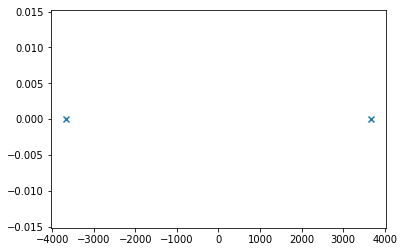

In [38]:
tsne_init = 'pca'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(centroids)
print(transformed_centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

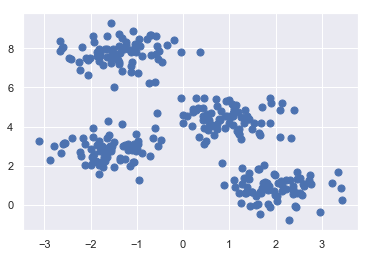

In [40]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

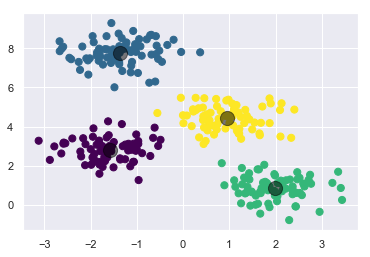

In [42]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);